In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

tech_list = ['SBIN.NS', 'RELIANCE.NS']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

dfs = {}

for stock in tech_list:
    df = yf.download(stock, start, end)
    dfs[stock] = df

SBIN = dfs['SBIN.NS']
RELIANCE = dfs['RELIANCE.NS']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
print(SBIN)

Price            Close        High         Low        Open    Volume
Ticker         SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS   SBIN.NS
Date                                                                
2024-03-20  724.106995  726.762475  707.928293  713.190091  25405455
2024-03-21  732.024170  738.220251  728.336019  729.762116  15161161
2024-03-22  734.384644  736.449984  729.172069  731.581613  15535921
2024-03-26  727.844299  735.515641  726.319876  730.794820  14678342
2024-03-27  721.205627  733.548628  718.156780  730.745657  30088789
...                ...         ...         ...         ...       ...
2025-03-12  723.049988  737.000000  719.049988  730.599976   5547762
2025-03-13  727.849976  731.450012  724.500000  725.900024   5908337
2025-03-17  723.150024  731.250000  722.299988  728.900024   5149563
2025-03-18  723.150024  723.150024  723.150024  723.150024         0
2025-03-19  745.099976  749.299988  739.099976  739.599976   7603348

[247 rows x 5 columns]


In [3]:
SBIN.describe()

Price,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,798.685048,807.488372,790.304878,799.942251,1.533337e+07
std,44.949182,45.597249,44.806158,45.118313,1.094050e+07
min,688.799988,697.400024,680.000000,690.150024,0.000000e+00
25%,761.774994,769.399994,752.554886,764.665376,1.001687e+07
50%,803.000000,812.900024,795.650024,803.000000,1.295094e+07
75%,832.700012,841.625000,823.799988,833.349976,1.747484e+07
max,905.650024,912.000000,883.299988,897.000000,1.223812e+08


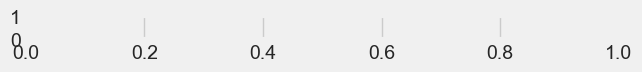

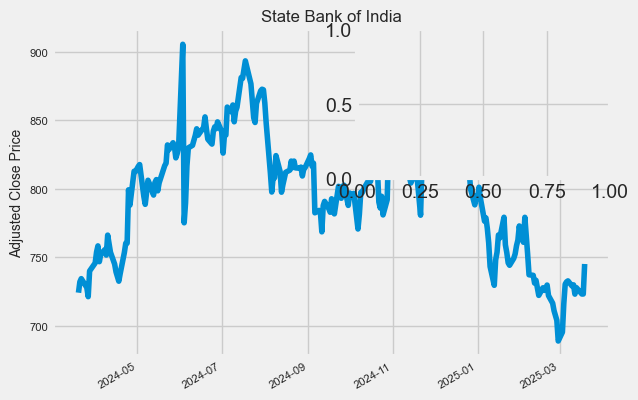

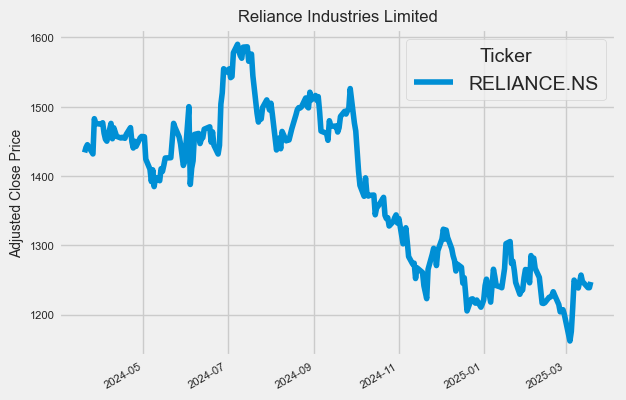

In [4]:
#The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price
#is the standard benchmark used by investors to track its performance over time.

# Let's see a historical view of the closing price
company_list = [(SBIN, 'State Bank of India'), (RELIANCE, 'Reliance Industries Limited')]
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (company, name) in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.title(name, fontsize=12)
    plt.ylabel('Adjusted Close Price', fontsize=10)
    plt.xlabel('')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

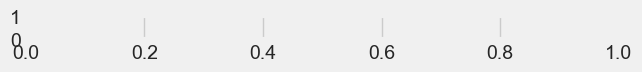

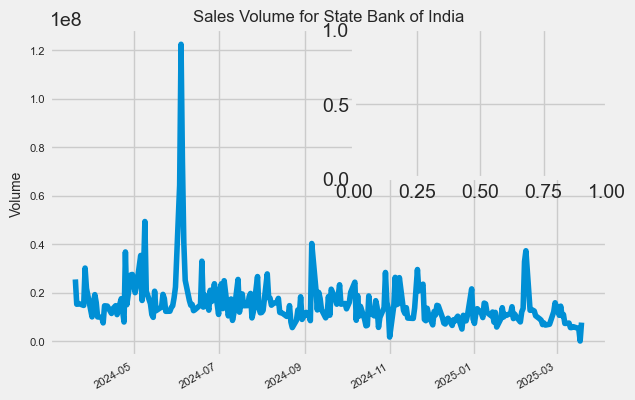

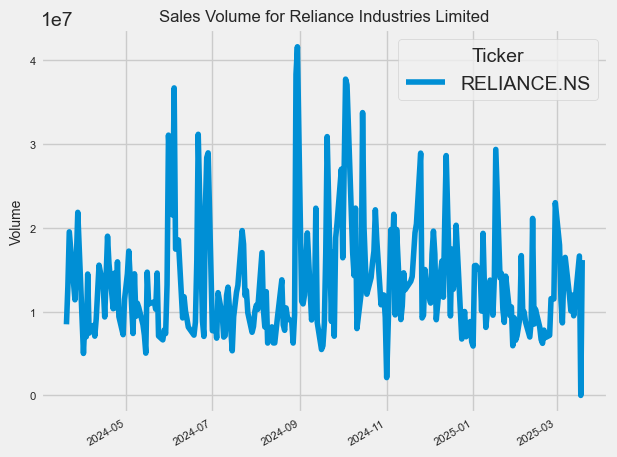

In [5]:
company_list = [(SBIN, 'State Bank of India'), (RELIANCE, 'Reliance Industries Limited')]
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (company, name) in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume', fontsize=10)
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name}", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
plt.tight_layout()

In [ ]:
import yfinance as yf

# Fetch stock data for SBIN.NS only
df = yf.download("SBIN.NS", start="2018-01-01", end="2025-03-19")
# Flatten the multi-level columns to a single level (MOST IMPORTANT STEP)
df.columns = [col[0] for col in df.columns]

# Check the columns and data
print(df.head())
print(df.columns)


[*********************100%***********************]  1 of 1 completed

                 Close        High         Low        Open    Volume
Date                                                                
2018-01-01  289.056152  294.374177  288.303140  292.350508  12182400
2018-01-02  285.432373  290.844529  283.644014  290.844529  14797364
2018-01-03  285.055847  288.444332  284.396965  287.361879  13857373
2018-01-04  290.373901  291.974028  285.338238  286.608924  24517099
2018-01-05  288.350250  293.103523  287.644317  293.103523  14580575
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [14]:
print(df.head())

                 Close        High         Low        Open    Volume
Date                                                                
2018-01-01  289.056152  294.374177  288.303140  292.350508  12182400
2018-01-02  285.432373  290.844529  283.644014  290.844529  14797364
2018-01-03  285.055847  288.444332  284.396965  287.361879  13857373
2018-01-04  290.373901  291.974028  285.338238  286.608924  24517099
2018-01-05  288.350250  293.103523  287.644317  293.103523  14580575


In [15]:
print(df.columns)  # Check available columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


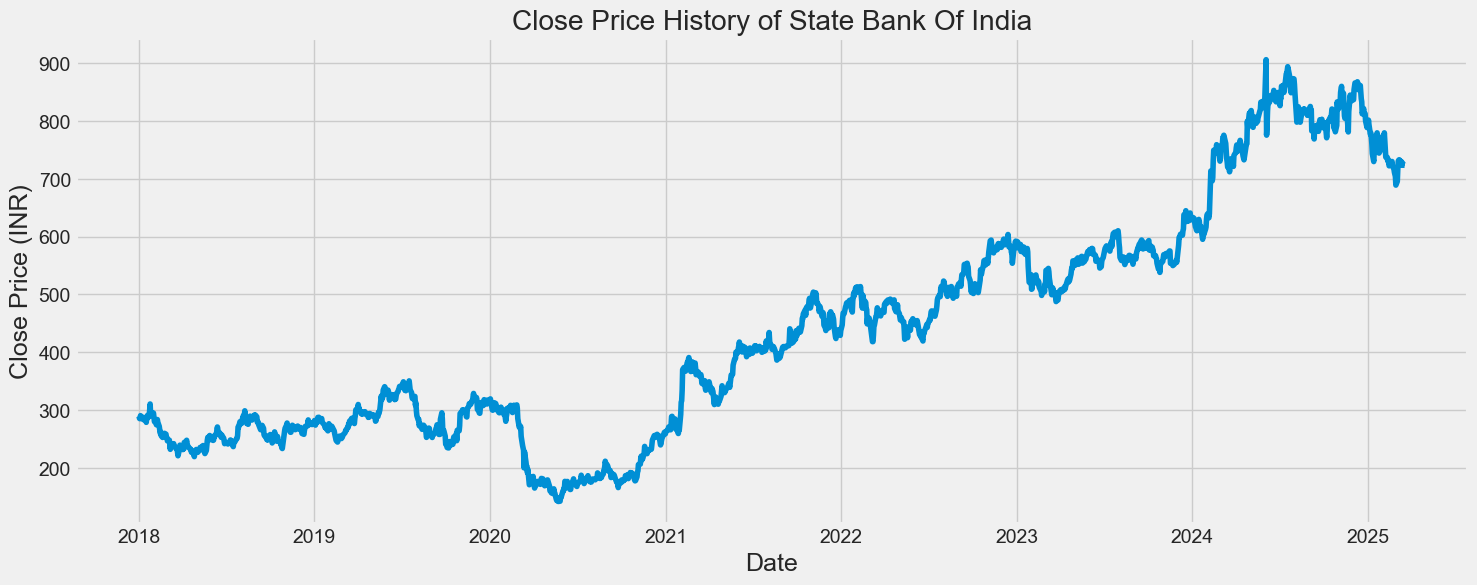

In [16]:
plt.figure(figsize=(16,6))
plt.title('Close Price History of State Bank Of India')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)
plt.show()

In [17]:
print(df[['Close']].info())  # Check for data type and missing values
print(df[['Close']].describe())  # Check if it contains meaningful values
print(df[['Close']].head())  # Preview first few rows

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2018-01-01 to 2025-03-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1781 non-null   float64
dtypes: float64(1)
memory usage: 27.8 KB
None
             Close
count  1781.000000
mean    437.769053
std     198.108205
min     141.986725
25%     269.195892
50%     409.469208
75%     566.942566
max     905.650024
                 Close
Date                  
2018-01-01  289.056152
2018-01-02  285.432373
2018-01-03  285.055847
2018-01-04  290.373901
2018-01-05  288.350250


In [18]:
# # Fix column names
# df.columns = df.columns.get_level_values(1)  # Get only the second level (ticker name)
# df = df.rename(columns={df.columns[0]: "Close"})  # Rename to a simple "Close"

# Check if it's fixed
print(df.head())
print(df.columns)


                 Close        High         Low        Open    Volume
Date                                                                
2018-01-01  289.056152  294.374177  288.303140  292.350508  12182400
2018-01-02  285.432373  290.844529  283.644014  290.844529  14797364
2018-01-03  285.055847  288.444332  284.396965  287.361879  13857373
2018-01-04  290.373901  291.974028  285.338238  286.608924  24517099
2018-01-05  288.350250  293.103523  287.644317  293.103523  14580575
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [19]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1692

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5])  # Check first 5 scaled values

[[0.19258412]
 [0.18783887]
 [0.18734581]
 [0.19430969]
 [0.19165976]]


In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.19258412, 0.18783887, 0.18734581, 0.19430969, 0.19165976,
       0.19098176, 0.18913296, 0.1851889 , 0.18654469, 0.18660628,
       0.18703771, 0.17908781, 0.19258412, 0.18783887, 0.19523409,
       0.19184463, 0.20614202, 0.22068598, 0.20004097, 0.1987468 ,
       0.20053394, 0.20016425, 0.19128991, 0.18056689, 0.18142959,
       0.17366463, 0.17495881, 0.18555859, 0.17939592, 0.16996702,
       0.1544987 , 0.15758005, 0.14889058, 0.1450081 , 0.14642556,
       0.15092429, 0.15006155, 0.15431375, 0.15234178, 0.14389885,
       0.14439185, 0.13718149, 0.13884545, 0.1302793 , 0.11807713,
       0.1305874 , 0.1262119 , 0.12571892, 0.12799908, 0.13089553,
       0.12676657, 0.12504101, 0.11967947, 0.12109689, 0.11974109,
       0.11179122, 0.10347161, 0.11789229, 0.12756771, 0.12208289])]
[np.float64(0.11746087781756182)]

[array([0.19258412, 0.18783887, 0.18734581, 0.19430969, 0.19165976,
       0.19098176, 0.18913296, 0.1851889 , 0.18654469, 0.18660628,
       0.18703771, 0.17

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#save the model
model.save('stock_price_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
from sklearn.metrics import r2_score

# assume that y_true and y_pred are the true and predicted values, respectively
r2 = r2_score(y_test, predictions)

print('R-squared score: {:.3f}'.format(r2))


In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid.loc[:, 'Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']], 'g')
plt.plot(valid[['Predictions']], 'r')
plt.legend(['Train', 'Validation','Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

In [ ]:
import numpy as np
import pandas as pd

# Load the data and extract the latest date information
import yfinance as yf

ticker = "AAPL"  # replace with the desired stock ticker
data = yf.download(ticker)

latest_date = data.index[-1].strftime("%Y-%m-%d")
print("Latest date:", latest_date)


# Convert the latest date information to a date object
latest_date = pd.to_datetime(latest_date)

# Increment the date to get the date for the next day
next_day = latest_date + pd.Timedelta(days=1)

# Reshape the data for prediction
real_data = x_train[-1,:,:]
real_data = real_data.reshape(1,real_data.shape[0],real_data.shape[1])

# Predict the next day price
next_day_price_prediction = model.predict(real_data)
next_day_price_prediction = scaler.inverse_transform(next_day_price_prediction)
next_day_price = next_day_price_prediction[0,0]

# Print the next day date and price
print("Next Day: ", next_day)
print("Next Day Price: ", next_day_price)